<a href="https://colab.research.google.com/github/AhmedAboushanab/Free-Work/blob/main/ML%20example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import statsmodels.api as sm
import numpy as np

In [ ]:
Data = pd.read_csv('https://raw.githubusercontent.com/ahmedmoustafa/datasets/main/iHMP_IBDMDB_2019/species.tsv', sep = '\t', index_col=0)
metadata = pd.read_csv('https://raw.githubusercontent.com/ahmedmoustafa/datasets/main/iHMP_IBDMDB_2019/metadata.tsv', sep = '\t',)

In [ ]:
Data.head()

,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Capnocytophaga;s__Capnocytophaga sp002999135,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Marinifilaceae;g__Odoribacter;s__Odoribacter sp905193145,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Cytophagales;f__Hymenobacteraceae;g__Adhaeribacter;s__Adhaeribacter rhizoryzae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Morganella;s__Morganella morganii_B,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Lactococcus_A;s__Lactococcus_A raffinolactis,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Kosakonia;s__Kosakonia sp014490785,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__JAGTTR01;s__JAGTTR01 sp018223385,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__UMGS363;s__UMGS363 sp900768245,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Acutalibacteraceae;g__Acutalibacter;s__Acutalibacter sp900759575,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Anaerostipes;s__Anaerostipes sp000508985,...,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__RUG11783;s__RUG11783 sp017548825,d__Bacteria;p__Acidobacteriota;c__Acidobacteriae;o__Acidobacteriales;f__SbA1;g__Bog-209;s__Bog-209 sp003139095,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Xanthobacteraceae;g__Pseudolabrys;s__Pseudolabrys sp903929045,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Acetilactobacillus;s__Acetilactobacillus jinshanensis,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Acidiferrobacterales;f__UBA6901;g__UBA6901;s__UBA6901 sp002451085,d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Selenomonadales;f__Selenomonadaceae;g__Anaerovibrio;s__Anaerovibrio lipolyticus_C,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__UBA4665;g__PMNU01;s__PMNU01 sp002952755,d__Bacteria;p__JACPQY01;c__JACPQY01;o__JACPQY01;f__JACPQY01;g__JACPQY01;s__JACPQY01 sp016190245,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Pelagibacterales;f__Pelagibacteraceae;g__Pelagibacter;s__Pelagibacter sp902546765,d__Bacteria;p__Patescibacteria;c__ABY1;o__Veblenbacterales;f__UBA10138;g__UBA10138;s__UBA10138 sp000995845
Sample,,,,,,,,,,,,,,,,,,,,,
MSM5LLDS,0.0,0.000560,0.000000,0.000002,0.0,0.0,0.000005,0.000019,0.000010,4.219070e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ESM5MEBE,0.0,0.000275,0.000000,0.000000,0.0,0.0,0.000101,0.000014,0.000005,6.851932e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MSM6J2IQ,0.0,0.000071,0.000000,0.000000,0.0,0.0,0.000021,0.000070,0.000004,1.263592e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HSM5MD62,0.0,0.000611,0.000000,0.000000,0.0,0.0,0.000013,0.000041,0.000002,3.007448e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HSM5MD5D,0.0,0.000042,0.000003,0.000000,0.0,0.0,0.000237,0.000202,0.000011,9.231876e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Data.shape

(382, 42871)

In [ ]:
metadata.head()

,Dataset,Sample,Subject,Study.Group,Gender,DOI,Publication.Name,consent_age,Age.Units,site_sub_coll,...,visit_num,site_name,age_at_diagnosis,Antibiotics,race,fecalcal,BMI_at_baseline,Height_at_baseline,Weight_at_baseline,smoking_status
0,iHMP_IBDMDB_2019,CSM5MCVN,C3002,CD,Female,10.1038/s41586-019-1237-9,Multi-omics of the gut microbial ecosystem in ...,76.0,Years,C3002C9,...,13,Cedars-Sinai,47.0,No,White,15.97901,NaN,NaN,NaN,NaN
1,iHMP_IBDMDB_2019,CSM5MCWE,C3009,CD,Male,10.1038/s41586-019-1237-9,Multi-omics of the gut microbial ecosystem in ...,56.0,Years,C3009C5,...,8,Cedars-Sinai,44.0,No,White,20.64059,NaN,NaN,NaN,NaN
2,iHMP_IBDMDB_2019,CSM5MCX3,C3006,UC,Male,10.1038/s41586-019-1237-9,Multi-omics of the gut microbial ecosystem in ...,32.0,Years,C3006C9,...,13,Cedars-Sinai,24.0,No,White,12.69817,20.1,180.0,65.0,Never smoked
3,iHMP_IBDMDB_2019,CSM5MCXL,C3004,UC,Female,10.1038/s41586-019-1237-9,Multi-omics of the gut microbial ecosystem in ...,47.0,Years,C3004C9,...,13,Cedars-Sinai,33.0,No,White,14.82410,NaN,NaN,NaN,NaN
4,iHMP_IBDMDB_2019,CSM5MCY8,C3005,UC,Female,10.1038/s41586-019-1237-9,Multi-omics of the gut microbial ecosystem in ...,76.0,Years,C3005C9,...,13,Cedars-Sinai,58.0,No,White,229.04730,30.9,165.0,84.0,Former smoker


In [ ]:
metadata.shape

(382, 24)

In [ ]:
#Align the two datasets based on sample identifiers to ensure consistency.
Data_2 = Data.merge(metadata[['Sample', 'Study.Group', 'Gender', 'consent_age', 'Age.Units', 'site_sub_coll', 'site_name', 'age_at_diagnosis', 'Antibiotics', 'race', 'fecalcal']], on = 'Sample')
Data_2.head()

,Sample,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Capnocytophaga;s__Capnocytophaga sp002999135,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Marinifilaceae;g__Odoribacter;s__Odoribacter sp905193145,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Cytophagales;f__Hymenobacteraceae;g__Adhaeribacter;s__Adhaeribacter rhizoryzae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Morganella;s__Morganella morganii_B,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Lactococcus_A;s__Lactococcus_A raffinolactis,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Kosakonia;s__Kosakonia sp014490785,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__JAGTTR01;s__JAGTTR01 sp018223385,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__UMGS363;s__UMGS363 sp900768245,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Acutalibacteraceae;g__Acutalibacter;s__Acutalibacter sp900759575,...,Study.Group,Gender,consent_age,Age.Units,site_sub_coll,site_name,age_at_diagnosis,Antibiotics,race,fecalcal
0,MSM5LLDS,0.0,0.000560,0.000000,0.000002,0.0,0.0,0.000005,0.000019,0.000010,...,CD,Female,30.0,Years,M2008C6,MGH,30.0,No,White,354.6256
1,ESM5MEBE,0.0,0.000275,0.000000,0.000000,0.0,0.0,0.000101,0.000014,0.000005,...,CD,Female,8.0,Years,E5001C11,Emory,8.0,No,More than one race,NaN
2,MSM6J2IQ,0.0,0.000071,0.000000,0.000000,0.0,0.0,0.000021,0.000070,0.000004,...,CD,Male,30.0,Years,M2014C14,MGH,30.0,No,White,168.3360
3,HSM5MD62,0.0,0.000611,0.000000,0.000000,0.0,0.0,0.000013,0.000041,0.000002,...,CD,Male,15.0,Years,H4015C2,Cincinnati,15.0,No,White,299.9883
4,HSM5MD5D,0.0,0.000042,0.000003,0.000000,0.0,0.0,0.000237,0.000202,0.000011,...,nonIBD,Female,13.0,Years,H4008C5,Cincinnati,NaN,No,White,NaN


In [ ]:
Data_2.shape

(382, 42882)

In [ ]:
features = Data.values
labels = Data.index.to_series().str.split('_').str[0]

In [ ]:
#Apply PCA and retain the components that explain a significant portion of the variance.
pca = PCA(n_components=None)
principal_components_2 = pca.fit_transform(features)
principal_components_2

array([[-1.20571790e-01,  3.37048653e-01, -7.49364940e-02, ...,
         1.15317605e-04,  3.34953642e-04,  1.12110476e-16],
       [ 1.14039474e-01,  1.10371599e-01, -3.09132090e-02, ...,
         8.79803664e-05, -6.87807154e-05,  1.12110476e-16],
       [ 2.71835714e-02, -4.11776036e-02,  1.07883823e-01, ...,
        -5.40124297e-05,  9.50687049e-05,  1.12110476e-16],
       ...,
       [ 1.83634898e-01, -5.44908631e-02, -4.11268039e-02, ...,
         1.10203573e-05, -1.51078990e-05,  1.12110476e-16],
       [-1.37782977e-02,  5.86343826e-02,  3.01017957e-02, ...,
        -1.14335020e-06,  1.59057458e-05,  1.12110476e-16],
       [-1.19950523e-01, -3.11099797e-02, -1.61693918e-02, ...,
         3.20643808e-05,  2.85031636e-05,  1.12110476e-16]])

In [ ]:
print(pca.explained_variance_ratio_)

[2.54949518e-01 8.17460069e-02 7.50269610e-02 5.36108880e-02
 4.89626929e-02 3.44561485e-02 3.31094083e-02 2.85915223e-02
 2.62293122e-02 2.24462994e-02 2.15777786e-02 1.94307366e-02
 1.92162933e-02 1.75893279e-02 1.59805916e-02 1.52132608e-02
 1.30315170e-02 1.25747514e-02 1.18881576e-02 1.13603256e-02
 9.91866600e-03 8.56569747e-03 8.32370706e-03 7.16590180e-03
 6.74238601e-03 6.36573369e-03 6.33840106e-03 5.99859725e-03
 5.83663432e-03 5.40733772e-03 5.34521263e-03 5.11678751e-03
 4.64160657e-03 4.30373442e-03 4.20981589e-03 4.03609897e-03
 3.64543016e-03 3.55753441e-03 3.18002989e-03 3.15046646e-03
 3.09007240e-03 2.56806351e-03 2.54746304e-03 2.43733187e-03
 2.42062491e-03 2.35223927e-03 2.32279450e-03 2.13027290e-03
 1.96218208e-03 1.77479185e-03 1.72986420e-03 1.63659509e-03
 1.58072128e-03 1.55760133e-03 1.43449666e-03 1.42192952e-03
 1.33198106e-03 1.26351542e-03 1.20781079e-03 1.16332433e-03
 1.00271580e-03 9.65663033e-04 9.04105720e-04 8.80997413e-04
 8.35716098e-04 8.113748

In [ ]:
principal_components_2.shape

(382, 382)

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)
principal_components

array([[-1.20571790e-01,  3.37048902e-01],
       [ 1.14039474e-01,  1.10371781e-01],
       [ 2.71835714e-02, -4.11776109e-02],
       [ 9.27372587e-02, -2.65667917e-02],
       [ 2.07248926e-03, -2.78482586e-02],
       [-1.13877255e-01,  1.35940991e-01],
       [ 2.25617874e-01, -5.30761710e-02],
       [-1.28584881e-01, -5.35706727e-02],
       [ 2.82239191e-01, -4.50159630e-02],
       [ 1.38615727e-01, -3.72759504e-02],
       [-1.15329957e-01,  9.26411020e-02],
       [ 3.26883500e-01, -3.81639335e-02],
       [ 1.46602293e-01, -2.78762226e-02],
       [-1.30896046e-02,  3.89360257e-03],
       [-1.09568766e-01,  2.56314669e-01],
       [ 1.04310115e-02, -2.15929711e-02],
       [ 1.39557351e-01,  1.06463106e-01],
       [-1.34439496e-01, -7.04366852e-02],
       [ 8.81768455e-02,  7.51152607e-02],
       [-1.22954095e-01, -7.53301467e-02],
       [-1.06552579e-01,  1.44873737e-02],
       [ 1.47303155e-01, -4.70825167e-03],
       [-3.70798827e-02, -4.18656663e-04],
       [-7.

In [ ]:
#Report the amount of variance explained by the first two principal components.
print(pca.explained_variance_ratio_)

[0.25494952 0.08174601]


In [ ]:
sample_data = Data_2['Sample']

In [ ]:
sample_data.head()

0    MSM5LLDS
1    ESM5MEBE
2    MSM6J2IQ
3    HSM5MD62
4    HSM5MD5D
Name: Sample, dtype: object

In [ ]:
principal_df = pd.DataFrame(data=principal_components, columns=['PC1','PC2'])
principal_df['Subtype'] = labels.values
principal_df['Sample'] = sample_data
principal_df = principal_df.merge(Data_2[['Sample', 'Study.Group', 'Gender', 'consent_age', 'Age.Units', 'site_sub_coll', 'site_name', 'age_at_diagnosis', 'Antibiotics', 'race', 'fecalcal']], on='Sample')
principal_df.head()

,PC1,PC2,Subtype,Sample,Study.Group,Gender,consent_age,Age.Units,site_sub_coll,site_name,age_at_diagnosis,Antibiotics,race,fecalcal
0,-0.120572,0.337049,MSM5LLDS,MSM5LLDS,CD,Female,30.0,Years,M2008C6,MGH,30.0,No,White,354.6256
1,0.114039,0.110372,ESM5MEBE,ESM5MEBE,CD,Female,8.0,Years,E5001C11,Emory,8.0,No,More than one race,NaN
2,0.027184,-0.041178,MSM6J2IQ,MSM6J2IQ,CD,Male,30.0,Years,M2014C14,MGH,30.0,No,White,168.3360
3,0.092737,-0.026567,HSM5MD62,HSM5MD62,CD,Male,15.0,Years,H4015C2,Cincinnati,15.0,No,White,299.9883
4,0.002072,-0.027848,HSM5MD5D,HSM5MD5D,nonIBD,Female,13.0,Years,H4008C5,Cincinnati,NaN,No,White,NaN


In [ ]:
principal_df.shape

(382, 14)

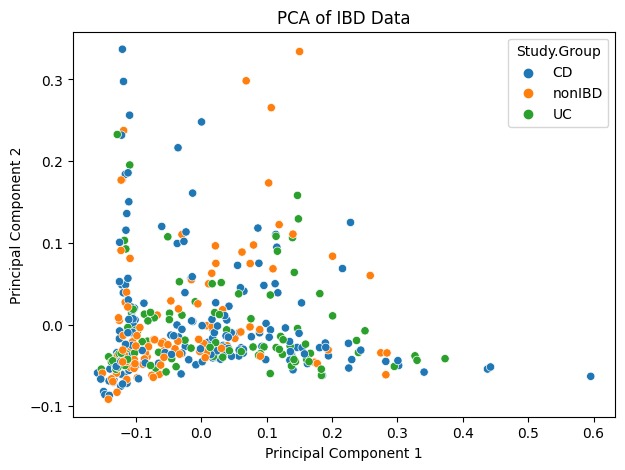

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data = principal_df, x = 'PC1', y = 'PC2', hue = 'Study.Group')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("PCA of IBD Data")
plt.show()

The CD group is more clustered with PC2, while the UC group is more clustered with PC1. The non-IBD are in between PC1 and PC2 with outliers in both PCs. This clustering indicates that IBD indeed affects the microbiome of the patient vs the healthy person. In addition, each type of IBD have preference for specific species than the other type.

In [ ]:
#Extra Mile
#Investigate the loadings of the principal components to identify which species contribute most to the separation between the groups.
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=Data.columns)
loadings

,PC1,PC2
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Capnocytophaga;s__Capnocytophaga sp002999135,-2.150736e-07,4.977793e-07
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Marinifilaceae;g__Odoribacter;s__Odoribacter sp905193145,-2.607120e-05,1.188395e-03
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Cytophagales;f__Hymenobacteraceae;g__Adhaeribacter;s__Adhaeribacter rhizoryzae,-1.483217e-07,-7.276667e-07
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Morganella;s__Morganella morganii_B,-1.007558e-03,-1.249554e-03
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Lactococcus_A;s__Lactococcus_A raffinolactis,-1.084100e-07,1.512515e-06
...,...,...
d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Selenomonadales;f__Selenomonadaceae;g__Anaerovibrio;s__Anaerovibrio lipolyticus_C,-1.607141e-08,2.011028e-08
d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__UBA4665;g__PMNU01;s__PMNU01 sp002952755,-1.741070e-08,2.178614e-08
d__Bacteria;p__JACPQY01;c__JACPQY01;o__JACPQY01;f__JACPQY01;g__JACPQY01;s__JACPQY01 sp016190245,-1.473213e-08,1.843443e-08
d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Pelagibacterales;f__Pelagibacteraceae;g__Pelagibacter;s__Pelagibacter sp902546765,-2.946426e-08,3.686885e-08


In [ ]:
loadings.idxmax

<bound method DataFrame.idxmax of                                                              PC1           PC2
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__F... -2.150736e-07  4.977793e-07
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__B... -2.607120e-05  1.188395e-03
d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__C... -1.483217e-07 -7.276667e-07
d__Bacteria;p__Proteobacteria;c__Gammaproteobac... -1.007558e-03 -1.249554e-03
d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactoba... -1.084100e-07  1.512515e-06
...                                                          ...           ...
d__Bacteria;p__Firmicutes_C;c__Negativicutes;o_... -1.607141e-08  2.011028e-08
d__Bacteria;p__Patescibacteria;c__Saccharimonad... -1.741070e-08  2.178614e-08
d__Bacteria;p__JACPQY01;c__JACPQY01;o__JACPQY01... -1.473213e-08  1.843443e-08
d__Bacteria;p__Proteobacteria;c__Alphaproteobac... -2.946426e-08  3.686885e-08
d__Bacteria;p__Patescibacteria;c__ABY1;o__Veble... -1.473213e-08  1.843443e-08

[42871 rows x 2 c

In [ ]:
#Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(Data_2.iloc[:,42871: 42882].values))

In [ ]:
print(X)

[[1.0 0.0 'CD' ... 'No' 'White' 354.6256]
 [1.0 0.0 'CD' ... 'No' 'More than one race' nan]
 [1.0 0.0 'CD' ... 'No' 'White' 168.336]
 ...
 [1.0 0.0 'UC' ... 'No' 'White' nan]
 [1.0 0.0 'CD' ... 'No' 'White' nan]
 [1.0 0.0 'nonIBD' ... 'No' 'White' nan]]


In [ ]:
#Determine whether other factors (e.g., sex or smoking) contribute to the differences
#in the microbiome between the samples (you might need to consider further principal components beyond the first two).
Features = X
labels = Data_2.index.to_series().apply(str).str.replace(',', '')

In [ ]:
#Apply PCA and retain the components that explain a significant portion of the variance.
pca = PCA(n_components=None)
principal_components_3 = pca.fit_transform(X)
principal_components_3

ValueError: ignored

In [ ]:
#Aditional Extra Mile (Optional)
New_data = Data_2.iloc[: , 1 : 42873]
New_data.head()

,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Capnocytophaga;s__Capnocytophaga sp002999135,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Marinifilaceae;g__Odoribacter;s__Odoribacter sp905193145,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Cytophagales;f__Hymenobacteraceae;g__Adhaeribacter;s__Adhaeribacter rhizoryzae,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Morganella;s__Morganella morganii_B,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Lactococcus_A;s__Lactococcus_A raffinolactis,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Kosakonia;s__Kosakonia sp014490785,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__JAGTTR01;s__JAGTTR01 sp018223385,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__UMGS363;s__UMGS363 sp900768245,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Acutalibacteraceae;g__Acutalibacter;s__Acutalibacter sp900759575,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Anaerostipes;s__Anaerostipes sp000508985,...,d__Bacteria;p__Acidobacteriota;c__Acidobacteriae;o__Acidobacteriales;f__SbA1;g__Bog-209;s__Bog-209 sp003139095,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Xanthobacteraceae;g__Pseudolabrys;s__Pseudolabrys sp903929045,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Acetilactobacillus;s__Acetilactobacillus jinshanensis,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Acidiferrobacterales;f__UBA6901;g__UBA6901;s__UBA6901 sp002451085,d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Selenomonadales;f__Selenomonadaceae;g__Anaerovibrio;s__Anaerovibrio lipolyticus_C,d__Bacteria;p__Patescibacteria;c__Saccharimonadia;o__Saccharimonadales;f__UBA4665;g__PMNU01;s__PMNU01 sp002952755,d__Bacteria;p__JACPQY01;c__JACPQY01;o__JACPQY01;f__JACPQY01;g__JACPQY01;s__JACPQY01 sp016190245,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Pelagibacterales;f__Pelagibacteraceae;g__Pelagibacter;s__Pelagibacter sp902546765,d__Bacteria;p__Patescibacteria;c__ABY1;o__Veblenbacterales;f__UBA10138;g__UBA10138;s__UBA10138 sp000995845,Study.Group
0,0.0,0.000560,0.000000,0.000002,0.0,0.0,0.000005,0.000019,0.000010,4.219070e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CD
1,0.0,0.000275,0.000000,0.000000,0.0,0.0,0.000101,0.000014,0.000005,6.851932e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CD
2,0.0,0.000071,0.000000,0.000000,0.0,0.0,0.000021,0.000070,0.000004,1.263592e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CD
3,0.0,0.000611,0.000000,0.000000,0.0,0.0,0.000013,0.000041,0.000002,3.007448e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CD
4,0.0,0.000042,0.000003,0.000000,0.0,0.0,0.000237,0.000202,0.000011,9.231876e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nonIBD


In [ ]:
X = New_data.iloc[:, : -1].values
y = New_data.iloc[:, -1].values

In [ ]:
#Encoding the dependent variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[0 0 0 0 2 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 2 0 1 0 2 0 2 0 0 0 0 2 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 2 0 2 0 0 0 2 0 2 0 1 0 1 1 0 0 1 1 2 1 1 2
 0 2 2 0 0 0 0 2 0 0 0 0 0 1 0 2 2 2 2 0 0 1 1 2 0 1 2 2 1 0 1 1 0 0 0 2 1
 0 1 1 0 0 1 1 0 0 2 0 2 2 0 1 0 0 2 0 0 0 0 0 2 2 0 2 2 0 2 0 0 0 0 0 0 0
 2 1 1 0 0 2 2 0 1 0 0 2 0 1 0 0 2 0 1 2 0 2 0 0 0 1 1 2 0 0 2 0 0 2 2 1 0
 1 0 1 2 0 1 0 2 0 0 1 2 1 0 0 1 0 1 2 0 0 1 0 1 2 2 2 0 0 2 2 1 0 0 1 0 0
 0 2 0 0 0 0 0 2 2 1 2 0 1 1 2 0 1 2 2 1 0 2 0 2 2 2 0 0 1 1 0 0 0 2 1 2 0
 2 0 2 0 1 1 0 0 1 0 1 1 2 0 0 2 1 0 1 2 2 2 1 2 2 0 1 0 1 0 0 0 0 2 1 0 1
 1 2 2 2 0 2 1 0 2 0 1 2 2 0 0 1 0 2 0 2 1 1 1 1 0 2 1 0 1 0 0 2 2 2 1 1 2
 1 1 2 2 1 0 1 0 2 0 1 1 1 2 0 2 1 0 0 1 2 1 2 2 2 0 0 0 0 1 1 0 0 0 1 2 1
 2 1 2 2 1 2 2 1 1 1 0 2]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[0.00e+00 2.59e-04 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 3.76e-04 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 5.39e-05 3.79e-06 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [0.00e+00 5.21e-05 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 2.11e-05 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 6.89e-05 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]]


In [ ]:

print(y_train)

[2 2 2 1 1 0 2 2 0 2 2 1 0 0 0 1 0 2 2 2 0 1 0 2 0 1 1 0 0 2 0 0 0 1 0 1 0
 2 2 2 2 0 2 0 0 0 0 0 0 0 2 2 2 0 0 0 0 2 0 2 0 0 0 0 1 2 2 1 2 1 2 1 1 0
 1 2 0 0 1 0 0 2 2 1 2 2 1 0 1 2 1 1 0 0 0 0 1 1 0 2 0 2 0 0 0 1 0 2 1 0 0
 1 1 0 0 1 0 0 2 1 2 1 1 0 0 1 1 2 2 1 0 1 0 2 2 1 0 0 0 2 0 2 1 0 0 2 0 1
 0 0 0 1 0 0 1 0 0 0 2 2 0 0 0 2 2 1 0 0 1 1 0 0 0 0 2 0 1 0 2 1 2 2 2 0 1
 0 0 1 2 0 0 0 1 0 2 1 0 0 1 2 2 1 0 0 2 0 2 0 0 0 1 0 0 2 0 0 2 2 2 0 1 0
 0 0 2 1 0 1 0 0 0 0 2 2 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 2 1 2 0 0
 1 1 1 0 1 0 1 2 0 0 0 0 2 1 2 0 1 2 1 0 1 1 0 2 1 0 0]


In [ ]:
print(X_test)

[[0.00e+00 1.01e-03 1.68e-06 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.61e-05 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 2.95e-04 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [9.87e-07 3.69e-05 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.03e-04 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.11e-04 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]]


In [ ]:
X_test.shape

(96, 42871)

In [ ]:
print(y_test)

[1 2 2 1 1 0 0 1 1 0 0 2 2 0 2 0 2 1 2 0 0 2 2 0 1 0 0 2 1 0 2 0 0 0 1 1 2
 0 1 2 1 0 2 0 1 0 2 0 2 0 0 2 2 0 0 2 1 2 2 1 1 1 0 0 0 0 0 1 0 1 2 2 1 2
 1 0 0 0 2 1 0 2 0 0 0 0 2 1 2 2 2 1 1 2 1 0]


In [ ]:
y_test.shape

(96,)

In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Training the simple linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predicting the test-set
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 0.43  1.  ]
 [ 0.99  2.  ]
 [ 0.04  2.  ]
 [ 1.1   1.  ]
 [ 0.69  1.  ]
 [ 0.14  0.  ]
 [ 0.24  0.  ]
 [ 1.65  1.  ]
 [ 1.58  1.  ]
 [ 0.69  0.  ]
 [ 0.37  0.  ]
 [ 1.76  2.  ]
 [ 1.52  2.  ]
 [ 1.57  0.  ]
 [ 1.39  2.  ]
 [ 0.24  0.  ]
 [ 1.53  2.  ]
 [ 0.76  1.  ]
 [ 1.66  2.  ]
 [ 1.04  0.  ]
 [ 0.08  0.  ]
 [ 1.86  2.  ]
 [ 1.67  2.  ]
 [ 0.9   0.  ]
 [ 0.99  1.  ]
 [ 1.73  0.  ]
 [ 0.2   0.  ]
 [ 0.97  2.  ]
 [ 1.36  1.  ]
 [ 0.32  0.  ]
 [ 1.7   2.  ]
 [ 0.31  0.  ]
 [ 1.49  0.  ]
 [ 1.49  0.  ]
 [ 0.68  1.  ]
 [ 1.76  1.  ]
 [ 1.79  2.  ]
 [ 1.56  0.  ]
 [ 0.13  1.  ]
 [ 1.86  2.  ]
 [ 1.18  1.  ]
 [ 2.22  0.  ]
 [-0.1   2.  ]
 [ 2.67  0.  ]
 [ 1.55  1.  ]
 [ 0.11  0.  ]
 [ 0.94  2.  ]
 [ 0.58  0.  ]
 [ 1.6   2.  ]
 [ 0.24  0.  ]
 [ 0.3   0.  ]
 [ 1.85  2.  ]
 [ 1.86  2.  ]
 [-1.21  0.  ]
 [ 0.38  0.  ]
 [ 1.39  2.  ]
 [-1.37  1.  ]
 [ 3.73  2.  ]
 [ 1.15  2.  ]
 [ 1.06  1.  ]
 [ 0.13  1.  ]
 [ 0.95  1.  ]
 [ 1.91  0.  ]
 [-0.67  0.  ]
 [ 0.45  0.  ]
 [ 0.66  0.  ]
 [ 0.38  0

In [ ]:
#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 20.13 %
Standard Deviation: 10.57 %


From the above results, it appears that this problem cannot be solved by simple or multiple linear regression. Therefore, it should be solved by other models like Random forest.

In [ ]:
X = New_data.iloc[:, : -1].values
y = New_data.iloc[:, -1].values

In [ ]:
#Random_Forest model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

In [ ]:
#Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10000, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10000, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [1 2]
 [1 2]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [2 1]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 1]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [1 0]
 [0 1]
 [2 0]
 [0 0]
 [0 2]
 [2 1]
 [0 0]
 [2 2]
 [0 0]
 [2 0]
 [2 0]
 [0 1]
 [2 1]
 [0 2]
 [0 0]
 [0 1]
 [2 2]
 [1 1]
 [0 0]
 [0 2]
 [0 0]
 [2 1]
 [0 0]
 [0 2]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [0 1]
 [1 2]
 [1 2]
 [0 1]
 [0 1]
 [1 1]
 [2 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 2]
 [2 2]
 [0 1]
 [0 2]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 2]
 [0 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [0 1]
 [1 1]
 [1 2]
 [1 1]
 [0 0]]


In [ ]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[33  2  4]
 [14  8  4]
 [ 6  6 19]]


0.625

In [ ]:
#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 59.78 %
Standard Deviation: 6.10 %


In [ ]:
#pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.3 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
#Feature importance using SHAP values from SHAP library
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(X_test)

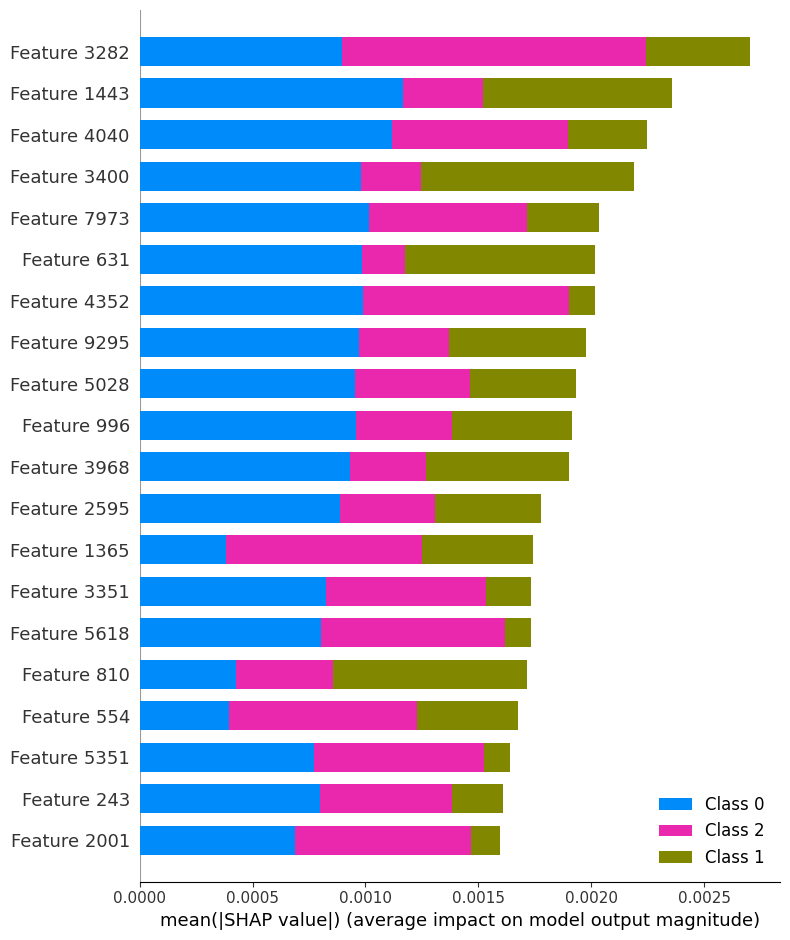

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

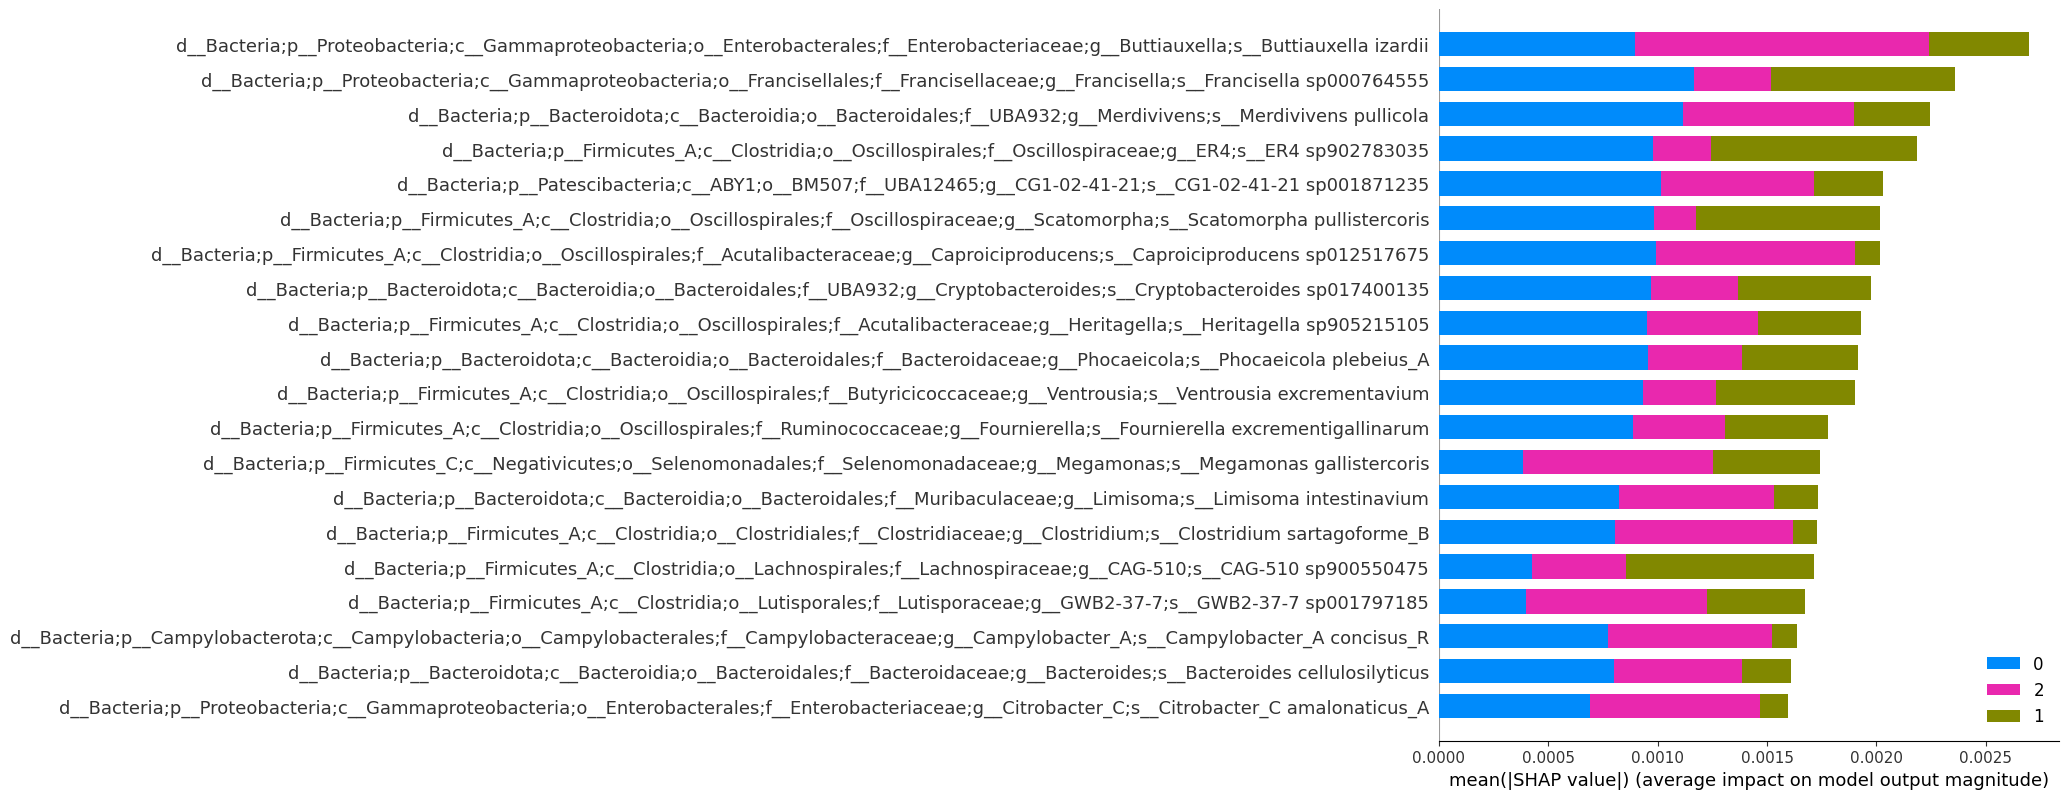

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names= Data_2.columns,
                  class_names = classifier.classes_)